## Тема роботи: побудова регресійної моделі.  
Мета роботи: навчитися  
a) ідентифікувати змінні моделі;  
b) здійснити специфікацію моделі;  
c) оцінити параметри моделі методом найменших квадратів;  
d) обчислити коефіцієнт кореляції rxy, оцінити щільність зв’язку між показником і  
фактором;  
e) обчислити коефіцієнт детермінації r  2  
f) дослідити статистичну значущість коефіцієнта детермінації;  
g) перевірити за допомогою f-критерію рівень значущості зв'язку між залежною і
незалежною змінними;  
h) перевірити значущість оцінок параметрів за допомогою t-критерію;  
i) визначити довірчі інтервали для коефіцієнтів рівняння регресії;  
j) виконати точковий та інтервальний прогнози.  

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statistics import mean
!pip install statsmodels
import statsmodels.api as sm
import seaborn as sns
import scipy.stats
from scipy import optimize
from statsmodels.compat import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets, linear_model, metrics

In [3]:
df = pd.read_csv('C:/Users/Kate/Desktop/Data Analysis/Datasets/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
y = df.price
x = df.carat

print(x.shape, y.shape)

(53940,) (53940,)


In [5]:
Y = y.values.reshape(-1, 1)
X = x.values.reshape(-1, 1)
print(Y, X)
print(Y.shape, X.shape)

[[ 326]
 [ 326]
 [ 327]
 ...
 [2757]
 [2757]
 [2757]] [[0.23]
 [0.21]
 [0.23]
 ...
 [0.7 ]
 [0.86]
 [0.75]]
(53940, 1) (53940, 1)


In [6]:
from sklearn.linear_model import LinearRegression

# Define model. Specify a number for random_state to ensure same results each run
model = LinearRegression()

# Fit model
model.fit(X, Y)

LinearRegression()

In [8]:
print("Making predictions for the following 5 diamonds:")
#print(X1.head())
print("The predictions are")
print(model.predict(Y))

Making predictions for the following 5 diamonds:
The predictions are
[[ 2526338.39087781]
 [ 2526338.39087781]
 [ 2534094.81649578]
 ...
 [21382209.06816016]
 [21382209.06816016]
 [21382209.06816016]]


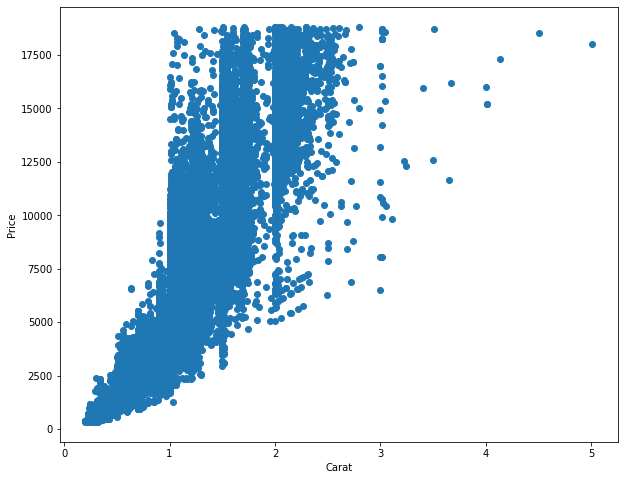

In [9]:
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'o')
plt.xlabel('Carat')
plt.ylabel('Price'); 

In [10]:
# number of observations/points
n = np.size(x)
n

53940

In [11]:
# mean of x and y vector
m_x = np.mean(X)
m_y = np.mean(Y)

print(m_x, m_y)

0.7979397478680014 3932.799721913237


In [12]:
# calculating cross-deviation and deviation about x
SS_xy = np.sum(y * x) - n * m_y * m_x
SS_xx = np.sum(x * x) - n * m_x * m_x
print(SS_xy, SS_xx)

94003020.98309621 12119.373744180579


In [13]:
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1 * m_x
print(b_0, b_1)

-2256.3605800453984 7756.42561796843


In [14]:
#correlation matrix
r = np.corrcoef(x, y)
r

array([[1.       , 0.9215913],
       [0.9215913, 1.       ]])

In [15]:
r_squared = r ** 2
r_squared

array([[1.        , 0.84933053],
       [0.84933053, 1.        ]])

In [16]:
r[0,1]
r[1,0]

0.921591301193476

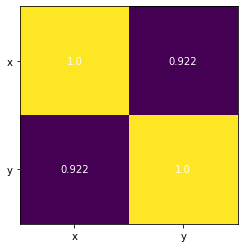

In [17]:
matrix = np.corrcoef(x, y).round(decimals=3)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

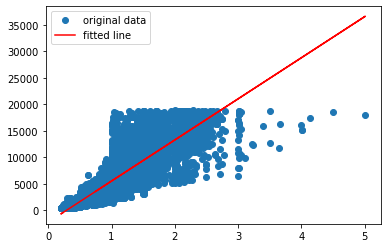

In [18]:
from scipy import stats
res = stats.linregress(x, y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()